# Bank Customers Segmentation

The bank currently faces the challenge of delivering personalized experiences to its diverse customer base. This project aims to address this challenge by developing a robust customer segmentation framework. By analyzing a comprehensive dataset of 1 Million+ transactions, we will identify distinct customer segments with unique characteristics and needs. These insights will enable the bank to personalize product offerings, tailor marketing campaigns, and improve customer service, ultimately enhancing customer satisfaction and driving business growth.

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# load data and view 5 random rows
# Google Colab
# df = pd.read_csv('/content/drive/Othercomputers/My Laptop - Personal/Files/Data_Files/Portfolio Projects/Bank/40k_bank_transactions.csv')

# local filepath
df = pd.read_csv('40k_bank_transactions.csv')
df.sample(5)

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
10844       T242665   C6721390    14/10/84          M       MUMBAI   
12861       T400606   C4482372    20/12/92          M     BILASPUR   
29829       T803942   C2830664     15/7/93          F    JALANDHAR   
22006       T742507   C2425126      5/7/61          M        DELHI   
27147       T388430   C5923363     16/2/67          M        DELHI   

       CustAccountBalance TransactionDate  TransactionTime  \
10844           217026.06          7/8/16           215340   
12861              142.70         18/8/16             3903   
29829               47.42          5/9/16           193011   
22006             5094.53          2/9/16           210149   
27147            54617.63         13/8/16           172728   

       TransactionAmount (INR)  
10844                   1083.0  
12861                   3256.0  
29829                     50.0  
22006                    190.0  
27147                   1999.0

In [4]:
# view dataset general features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            40000 non-null  object 
 1   CustomerID               40000 non-null  object 
 2   CustomerDOB              39867 non-null  object 
 3   CustGender               39956 non-null  object 
 4   CustLocation             39997 non-null  object 
 5   CustAccountBalance       39901 non-null  float64
 6   TransactionDate          40000 non-null  object 
 7   TransactionTime          40000 non-null  int64  
 8   TransactionAmount (INR)  40000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.7+ MB


In [5]:
# view missing values
df.isna().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                133
CustGender                  44
CustLocation                 3
CustAccountBalance          99
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [6]:
# view duplicates
df[df.duplicated() == 1]

Empty DataFrame
Columns: [TransactionID, CustomerID, CustomerDOB, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
Index: []

In [7]:
print(df['CustomerID'].nunique())
print(df['TransactionID'].nunique())

39719
40000


In [8]:
# view unique genders
df['CustGender'].value_counts()

CustGender
M    29308
F    10648
Name: count, dtype: int64

In [9]:
# view number of unique locations
df['CustLocation'].nunique()

2733

*The approach to handle missing data includes:*

1. Dropping rows where there are null values in the 'CustGender', 'CustomerDOB', and 'CustAccountBalance' columns to maintain data quality.

2. Filling missing values in 'CustLocation' by backfilling (using the next row's value).
3. Removing erroneous gender values where 'CustGender' contains a gender entry 'T', which will be dropped to ensure accurate gender classification.
4. Convert the `TransactionDate` to date format.
5. Drop the `TransactionTime` column since the time format was not specified, pandas cannot infer for conversion.

In [10]:
# Remove rows with null values in 'CustGender', 'CustomerDOB', and 'CustAccountBalance'
data = df.dropna(subset=['CustGender', 'CustomerDOB', 'CustAccountBalance'])

# Drop rows where 'CustGender' is 'T' (incorrect gender value)
data = data[data['CustGender'] != 'T']

# Fill null values in 'CustLocation' with the value from the next row (below)
data['CustLocation'] = data['CustLocation'].fillna(method='bfill')

# drop TransactionTime column
data.drop(columns='TransactionTime', inplace=True)

data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionAmount (INR)    0
dtype: int64

In [11]:
# Convert 'TransactionDate' to date format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], infer_datetime_format=True)

# Convert 'CustomerDOB' to date format
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], infer_datetime_format=True)

In [12]:
data.head()

TransactionID CustomerID CustomerDOB CustGender     CustLocation  \
0       T892846   C5725279  1984-08-09          M           JASPUR   
1       T444995   C4588538  1994-02-01          M          GURGAON   
2       T614897   C2416476  1990-11-14          M        NEW DELHI   
3       T457037   C5940151  1990-09-15          M        HYDERABAD   
4       T997442   C5922989  1988-11-27          M  PURBO MEDINIPUR   

   CustAccountBalance TransactionDate  TransactionAmount (INR)  
0            84447.82      2016-07-09                  11858.0  
1            12549.49      2016-08-16                    250.0  
2            33607.65      2016-08-26                   3360.0  
3            38238.86      2016-08-21                    250.0  
4             9506.85      2016-09-14                     33.0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39726 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            39726 non-null  object        
 1   CustomerID               39726 non-null  object        
 2   CustomerDOB              39726 non-null  datetime64[ns]
 3   CustGender               39726 non-null  object        
 4   CustLocation             39726 non-null  object        
 5   CustAccountBalance       39726 non-null  float64       
 6   TransactionDate          39726 non-null  datetime64[ns]
 7   TransactionAmount (INR)  39726 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 2.7+ MB


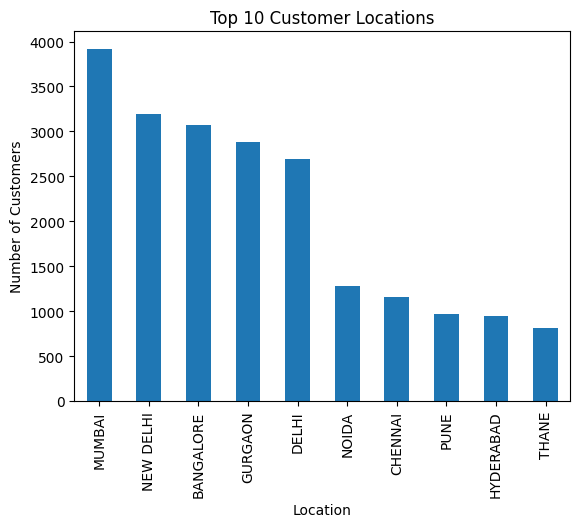

In [14]:
# view 10 locations with most customers
top10_locations = df['CustLocation'].value_counts().head(10)
top10_locations.plot(kind='bar')
plt.title('Top 10 Customer Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()

# Feature engineering
- Add the following columns;
    - `Age` - age of the custumer based on current year
    - `Ave_Transaction` - Average transaction of each customer
    - `Transaction_frequency` - Group transactions by `CustomerID` to calculate the number of transactions

In [15]:
# add 'CustomerAge' column
from datetime import datetime
data['CustomerAge'] = data['CustomerDOB'].apply(lambda x: datetime.now().year - pd.to_datetime(x).year)

# add 'AvgTransaction'
# Group by CustomerID to calculate average transaction amount
customer_summary = data.groupby('CustomerID').agg({
    'TransactionAmount (INR)': 'mean',
    'TransactionID': 'count'
}).rename(columns={
    'TransactionAmount (INR)': 'AvgTransactionAmount',
    'TransactionID': 'TransactionFrequency'
})

# Reset index for easier access
customer_summary = customer_summary.reset_index()

data.head()

TransactionID CustomerID CustomerDOB CustGender     CustLocation  \
0       T892846   C5725279  1984-08-09          M           JASPUR   
1       T444995   C4588538  1994-02-01          M          GURGAON   
2       T614897   C2416476  1990-11-14          M        NEW DELHI   
3       T457037   C5940151  1990-09-15          M        HYDERABAD   
4       T997442   C5922989  1988-11-27          M  PURBO MEDINIPUR   

   CustAccountBalance TransactionDate  TransactionAmount (INR)  CustomerAge  
0            84447.82      2016-07-09                  11858.0           41  
1            12549.49      2016-08-16                    250.0           31  
2            33607.65      2016-08-26                   3360.0           35  
3            38238.86      2016-08-21                    250.0           35  
4             9506.85      2016-09-14                     33.0           37

 - Convert Timestamps to Numeric Features, ie. such as the day, month, year

In [16]:
# Extract features from the 'TransactionDate' column
data['TransactionDate_year'] = data['TransactionDate'].dt.year
data['TransactionDate_month'] = data['TransactionDate'].dt.month
data['TransactionDate_day'] = data['TransactionDate'].dt.day

# Drop the original 'TransactionDate' column
data = data.drop(columns=['TransactionID','CustomerID', 'TransactionDate', 'CustomerDOB'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39726 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustGender               39726 non-null  object 
 1   CustLocation             39726 non-null  object 
 2   CustAccountBalance       39726 non-null  float64
 3   TransactionAmount (INR)  39726 non-null  float64
 4   CustomerAge              39726 non-null  int64  
 5   TransactionDate_year     39726 non-null  int32  
 6   TransactionDate_month    39726 non-null  int32  
 7   TransactionDate_day      39726 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(2)
memory usage: 2.3+ MB


### Standardize the data
 - Use standardization for the columns (mean = 0, std = 1) for clustering algorithm is sensitive to the mean and standard deviation 

In [18]:
from sklearn.preprocessing import StandardScaler

# Select the columns to normalize
cols_to_standardize = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge',
                     'TransactionDate_year', 'TransactionDate_month', 'TransactionDate_day']

# Initialize Standard Scaler
scaler = StandardScaler()

# Apply standardization
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])
data.describe()

CustAccountBalance  TransactionAmount (INR)   CustomerAge  \
count        3.972600e+04             3.972600e+04  3.972600e+04   
mean         2.682913e-17             8.585322e-18 -6.868258e-17   
std          1.000013e+00             1.000013e+00  1.000013e+00   
min         -1.428824e-01            -2.601954e-01 -1.769042e+00   
25%         -1.364069e-01            -2.328467e-01 -1.385779e-01   
50%         -1.200125e-01            -1.841164e-01 -5.904301e-02   
75%         -6.591042e-02            -6.378235e-02  4.037556e-02   
max          1.110508e+02             7.084740e+01  3.679095e+00   

       TransactionDate_year  TransactionDate_month  TransactionDate_day  
count               39726.0           3.972600e+04         3.972600e+04  
mean                    0.0          -1.448773e-17        -7.565815e-17  
std                     0.0           1.000013e+00         1.000013e+00  
min                     0.0          -2.423169e+00        -8.858426e-01  
25%                     0.0          -5.183553e-01        -8.858426e-01  
50%                     0.0           2.435703e-01        -7.487003e-01  
75%                     0.0           6.245331e-01         7.598648e-01  
max                     0.0           1.767421e+00         2.268430e+00

### Encode categorical data

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=True, drop='first')
categorical_features = ['CustGender', 'CustLocation']

# Apply the encoder
encoded_cats = encoder.fit_transform(data[categorical_features])

# Convert sparse matrix to a sparse DataFrame with proper column names
encoded_df = pd.DataFrame.sparse.from_spmatrix(
    encoded_cats,
    columns=encoder.get_feature_names_out(categorical_features)
)

# Concatenate the sparse DataFrame with the original data
data_encoded = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop original categorical columns
data_encoded.drop(categorical_features, axis=1, inplace=True)
data_encoded.shape

(39726, 2716)

In [21]:
# Convert all column names to strings
data_encoded.columns = data_encoded.columns.astype(str)

In [22]:
non_numeric_columns = data_encoded.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [23]:
data_encoded.head(2)

CustAccountBalance  TransactionAmount (INR)  CustomerAge  \
0           -0.028710                 1.705261     0.020492   
1           -0.125916                -0.218758    -0.178345   

   TransactionDate_year  TransactionDate_month  TransactionDate_day  \
0                   0.0              -0.137392            -0.748700   
1                   0.0               0.243570             0.211296   

   CustGender_M  CustLocation_(E) MUMBAI  CustLocation_(EAST) MUMBAI  \
0           1.0                        0                           0   
1           1.0                        0                           0   

   CustLocation_(EAST) THANE  ...  CustLocation_YAVATMAL  \
0                          0  ...                      0   
1                          0  ...                      0   

   CustLocation_YAVATMAL- DISTRICT  CustLocation_YEDTHARE  \
0                                0                      0   
1                                0                      0   

   CustLocation_YEHAKANKA BANGALORE  CustLocation_YEOLA  \
0                                 0                   0   
1                                 0                   0   

   CustLocation_YERWADA ABOVE IDEA SHOWROOM PUNE  CustLocation_ZADGAON  \
0                                              0                     0   
1                                              0                     0   

   CustLocation_ZIRAKPUR  CustLocation_ZIRKPUR  \
0                      0                     0   
1                      0                     0   

   CustLocation_ZONE WHITEFIELD BANGALORE  
0                                       0  
1                                       0  

[2 rows x 2716 columns]

# Modeling
- Use K-Means as the main clustering algorithm.
    - Determine the best number of clusters (K) for your segmentation task using the Elbow Method.
    - The Elbow Method helps to determine the optimal number of clusters by plotting the inertia (sum of squared distances of samples to their closest cluster center) for different values of K.

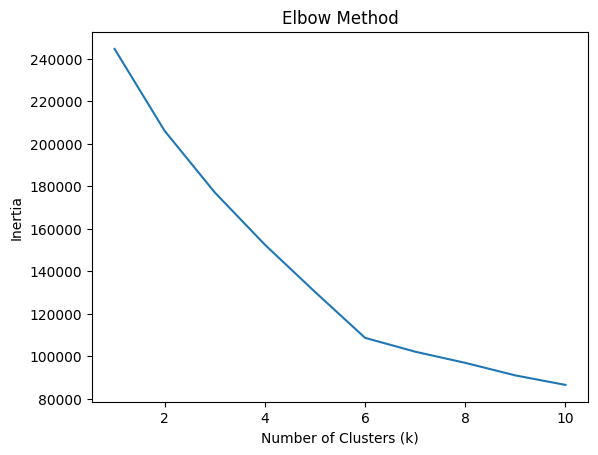

In [25]:
from sklearn.cluster import KMeans
# Elbow Method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [27]:
from sklearn.cluster import KMeans

optimal_k = 6
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_encoded)

# Get cluster labels
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded)

#### Profile the Clusters
Profiling involves analyzing the average value of features in each cluster to understand the key characteristics of each customer group.

In [36]:
# Compute the mean of each feature within each cluster
cluster_profile = data_encoded.groupby('Cluster').mean()
cluster_profile.T

Cluster                                        0         1         2  \
CustAccountBalance                     -0.023596 -0.028619 -0.006360   
TransactionAmount (INR)                -0.061531 -0.052620 -0.057947   
CustomerAge                            -0.213219 -0.194417 -0.212558   
TransactionDate_year                    0.000000  0.000000  0.000000   
TransactionDate_month                   0.635802 -1.456697  0.314932   
...                                          ...       ...       ...   
CustLocation_ZIRAKPUR                   0.001795  0.001982  0.001795   
CustLocation_ZIRKPUR                    0.000000  0.000104  0.000000   
CustLocation_ZONE WHITEFIELD BANGALORE  0.000062  0.000000  0.000000   
PCA1                                    0.101499 -1.609444  1.157766   
PCA2                                   -0.149736 -0.071092 -0.119955   

Cluster                                        3          4          5  
CustAccountBalance                      0.186228   0.387893  91.256139  
TransactionAmount (INR)                 0.131782  11.478184   5.534514  
CustomerAge                             3.679095   0.249640  -1.033345  
TransactionDate_year                    0.000000   0.000000   0.000000  
TransactionDate_month                  -0.001373   0.067027  -0.391368  
...                                          ...        ...        ...  
CustLocation_ZIRAKPUR                   0.002845   0.000000   0.000000  
CustLocation_ZIRKPUR                    0.000000   0.000000   0.000000  
CustLocation_ZONE WHITEFIELD BANGALORE  0.000000   0.000000   0.000000  
PCA1                                    0.107298   0.076426   1.371947  
PCA2                                    1.406212   8.243051  62.505126  

[2718 rows x 6 columns]

**Cluster Profiles:**

- Cluster `0`: Characterized by low average account balances, low transaction amounts, and relatively young customers.
- Cluster `1`: Shares similarities with Cluster 0, having low account balances and transaction amounts, but with a slightly older customer base.
- Cluster `2`: Also exhibits low account balances and transaction amounts, with a customer age profile similar to Cluster 0.
- Cluster `3`: Stands out with significantly higher transaction amounts and a much older customer base compared to the other clusters.
- Cluster `4`: This cluster boasts the highest account balances and transaction amounts, suggesting high-value customers. The customer age is moderate.
- Cluster `5`: This cluster has the highest account balances and a relatively older customer base. The transaction amounts are high, but not as high as Cluster 4.

**PCA Visualization**
Visualizing the clusters in 2D space using PCA components (PCA1, PCA2) to understand the separation of clusters.

In [39]:
# Create scatter plot with Plotly
fig = px.scatter(data_encoded, x='PCA1', y='PCA2', color='Cluster', title='Cluster Profiling in PCA Space')

# Update marker size to make dots smaller
fig.update_traces(marker=dict(size=5))

# Update layout
fig.update_layout(
    xaxis_title='PCA1',
    yaxis_title='PCA2',
    coloraxis_colorbar_title='Cluster'
)

# Show plot
fig.show()

**Insights**

- **Cluster Separation:**
Clusters 0, 1, and 2 appear to be relatively close to each other in the PCA space, suggesting some degree of similarity among these customer segments.
- **Outlier Clusters:**
Cluster 4 and Cluster 5 seem to be more distinct and separated from the other clusters, potentially indicating unique customer behaviors or characteristics.
- **Cluster Density:**
The density of points within each cluster can provide insights into the homogeneity or heterogeneity of the customer segments. For instance, if a cluster has a high density of points, it suggests that the customers within that segment are relatively similar to each other.